In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Import libraries**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 150)
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_colwidth', None)

# **Inroduction**

<font size="5">This notebook will explore data from Machine Learning and Data Science Survey competition!</font>
<br>
<br><font size="5">I am a data scientist from Ukraine. So, I'd like to explore subgroup of professionals from my country. </font>
<br>
<br>
<img src="http://galinfo.com.ua/media/gallery/intxt/w/e/welcome20to20ukraine.jpg" width="600" height="700">
<img src="https://www.state.gov/wp-content/uploads/2018/11/Ukraine-2109x1406.jpg" width="600" height="700">


# **Load data**

In [ ]:
data = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv', dtype=object, low_memory=False)
data_all = data.iloc[1:,:]

In [ ]:
print("There are \033[1m{} countries\033[0m took part in this survey".format(len(data_all['Q3'].value_counts().to_list())))

In [ ]:
fig = px.treemap(data_all, path=['Q3'], color='Q3')
fig.update_layout(margin = dict(t=60, l=15, r=15, b=15),
                  title_text="<b>Countries Distribution</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=20, color='#000000'))
fig.show()

In [ ]:
data_ukraine = data[data['Q3']=='Ukraine']
questions = data.iloc[0, :]
print("Ukrainian Respondents:", data_ukraine.shape[0])

In [ ]:
# Replace some countries names to make the plot ticks more manageable
data['Q3'].replace({
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran, Islamic Republic of...': 'Iran'
}, inplace=True)

# Calculate number of respondents per Country in 2021
country_cnt_2021 = data['Q3'].value_counts()

# Plot figure object
fig, ax = plt.subplots(1, 1, figsize=(20, 10), dpi=200)

# Bar plot 
bar_colors = ['#0077b6'] * 28 + ['#EEEF20'] + ['#0077b6'] * 2 
ax.bar(country_cnt_2021.index[:31],
        country_cnt_2021[:31],
        color=bar_colors,
        edgecolor='white',
        width=0.9);

# Set title
ax.set_title('Number of Respondents per Country',
             fontsize=20, fontfamily='serif', fontweight='bold', color='black')


# Axes xticks rotation
ax.set_xticklabels(labels=country_cnt_2021.index[:31], rotation=65, fontsize=17)

# Remove yticks
ax.tick_params(left=False, bottom=False)
ax.set_yticklabels([])

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Annotate bars
for i, bar in enumerate(ax.patches):
    ax.annotate(text=bar.get_height(),
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height() + 300),
                ha='center',
                va='center',
                rotation=50,
                size=17 if i != 28 else 25)

<font size="5">In the chart above you can see that there are <strong>186</strong> records in oridginal data that we are interested in. Let's dive into it! :)</font>

In [ ]:
# select responses relative to Ukraine
data_ukraine = data[data['Q3']=='Ukraine']
questions = data.iloc[0, :]

# **Exploring gender distribution**

In [ ]:
data_ukraine['Q2'].value_counts()

In [ ]:
gender = (
    data_ukraine['Q2']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Gender', 'Q2':'Count'})
    .replace(['Man','Woman'], ['Male', 'Female']) 
    .groupby('Gender')
    .sum()
    .reset_index()    
          )   

fig = go.Figure(data=[go.Pie(labels=gender['Gender'], 
                             values=gender['Count'])])

fig.update_traces(hoverinfo='percent+value', 
                  textinfo='label', 
                  textfont_size=20,
                  marker=dict(colors=['#ffff3f', '#0077b6'], line=dict(color='white', width=5)))

fig.update_layout(showlegend=False, 
                  title_text="<b>Gender Distribution</b>",
                  title_x=0.5,
                  font=dict(family='serif', size=20, color='#000000'))

fig.show()

<font size="5">Not a surprise that there are many more <em>men</em> in the industry, but according to the data <em>women</em> contains <em>16.1%</em> of all responses.</font>
<!-- <font size="3">This notebook will explore data from Machine Learning and Data Science Survey competition!</font> -->

# **Exploring educational level of the respondents**

In [ ]:
data_ukraine['Q4'].replace({
    'Some college/university study without earning a bachelor’s degree': 'No bachelor’s degree',
    'No formal education past high school': 'High school'
}, inplace=True)

education = (
    data_ukraine['Q4']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Education', 'Q4':'Count'})
          )  

education['percent'] = ((education['Count'] / education['Count'].sum())*100).round(2).astype(str) + '%'
colors = ['#014f86', '#2a6f97', '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']


fig = go.Figure(go.Bar(
            x=education['Count'],
            y=education['Education'],
            text=education['percent'],
            orientation='h',
            marker_color=colors
                        ))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{x}<extra></extra> ',
                  textfont_size=17)
                  
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': False},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Education Distribution</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

<font size="5">As you can see half of responders have <em>Master's degree</em>. And only 2.15% finished only <em>High school</em>. So, education really matters!</font>


In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("<b>Men</b>", "<b>Women</b>"), shared_yaxes=True)

education_man = (
    data_ukraine[data_ukraine['Q2']=='Man']['Q4']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Education', 'Q4':'Count'})
          )  

education_man['percent'] = ((education_man['Count'] / education_man['Count'].sum())*100).round(2).astype(str) + '%'
colors_education_man = ['#014f86', '#2a6f97', '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']

fig.add_trace(
    go.Bar(
            x=education_man['Education'],
            y=education_man['Count'],
            text=education_man['percent'],
            marker_color=colors_education_man),
    row=1, col=1
)
fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra>',
                  textfont_size=17)


education_woman = (
    data_ukraine[data_ukraine['Q2']=='Woman']['Q4']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Education', 'Q4':'Count'})
          )   

education_woman['percent'] = ((education_woman['Count'] / education_woman['Count'].sum())*100).round(2).astype(str) + '%'
colors_education_woman = ['#FFA200', '#FFAA00', '#FFB700','#FFC300', '#FFD000', '#FFDD00', '#FFEA00']

fig.add_trace(
   go.Bar(
            x=education_woman['Education'],
            y=education_woman['Count'],
            text=education_woman['percent'],
            marker_color=colors_education_woman),
    row=1, col=2)

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)
                  
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Education Distribution</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()


<font size="5">The same situation if we look on it in gender perspective most respondents have <em>MS or BS degree</em> at least. But <em>Doctoral degree</em> is more popular among men.</font>


# **Exploring age distribution**

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("<b>Men</b>", "<b>Women</b>"), shared_yaxes=True)

age_man = (
    data_ukraine[data_ukraine['Q2']=='Man']['Q1']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Age', 'Q1':'Count'})
          )  

age_man['percent'] = ((age_man['Count'] / age_man['Count'].sum())*100).round(2).astype(str) + '%'
colors_man = ['#012a4a','#013a63','#01497c','#014f86', '#2a6f97', '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']


fig.add_trace(
    go.Bar(
            x=age_man['Age'],
            y=age_man['Count'],
            text=age_man['percent'],
            marker_color=colors_man),
    row=1, col=1
)
fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra>',
                  textfont_size=17)


age_woman = (
    data_ukraine[data_ukraine['Q2']=='Woman']['Q1']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Age', 'Q1':'Count'})
          )  

age_woman['percent'] = ((age_woman['Count'] / age_woman['Count'].sum())*100).round(2).astype(str) + '%'
colors_woman = ['#FF7B00','#FF8800','#FF9500','#FFA200', '#FFAA00', '#FFB700','#FFC300', '#FFD000', '#FFDD00', '#FFEA00']

fig.add_trace(
   go.Bar(
            x=age_woman['Age'],
            y=age_woman['Count'],
            text=age_woman['percent'],
            marker_color=colors_woman),
    row=1, col=2)

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)
                  
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Age Distribution</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()


<font size="5">Age is pretty much the same for all genders. Most respondents in between <em>18-40 years</em>. But there are more men rather then women in the age <em>40+</em></font>


# **Current role**

In [ ]:
current_role = (
    data_ukraine['Q5']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Current role', 'Q5':'Count'})
          )  

current_role['percent'] = ((current_role['Count'] / current_role['Count'].sum())*100).round(2).astype(str) + '%'
colors = ['#1c204b','#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae']


fig = go.Figure(go.Bar(
            x=current_role['Count'],
            y=current_role['Current role'],
            text=current_role['percent'],
            orientation='h',
            marker_color=colors
                        ))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{x}<extra></extra> ',
                  textfont_size=17)
                  
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': False},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Current role</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

<font size="5">Most of ukrainian respondents take role iether <em>Data Scientist, Student or Software Engineer</em>. The role <em>Machine Learning Engineer</em> is occupied only by 14 people (7.53%)</font>


# **Current role by genders**

<font size="5">On the chart below you can click different parts of it to explore allocation of gender, education level and current role. 
    <br>
    <br>For me interesting insights that women with <strong>BS degree</strong> either unemployed or work as a <em>Data Engineers</em>, whereas men with BS takes positions as <em>Data Scientists or Software Engineer</em> in addition.
    <br><br>Men and women with <strong>Doctoral degree</strong> mostly take roles as <em>Research Scientists and Data Scientists</em>.
    <br><br>Also, according to the data <strong>High school</strong> is enough for <em>Data Analyst</em> role in Ukraine.
    <br>
    <img src="https://miro.medium.com/max/740/1*1adquzfD-i4n1Z4ZGxlrtQ.jpeg" width="600" height="700">
    </font>

<!--     <img src="https://naked-science.ru/wp-content/uploads/2020/09/Blackboard-with-algorithms-and-info.jpg" width="500" height="500"> -->

In [ ]:
fig = px.sunburst(data_ukraine, path=['Q2', 'Q4', 'Q5'], color='Q2',color_discrete_map={'Man':'#0077b6', 'Woman':'#ffff3f'})
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Distribution of roles by gender and education</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

# **Years of programming experience**

In [ ]:
experience = (
    data_ukraine['Q6']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Experience', 'Q6':'Count'})
          )   

experience['percent'] = ((experience['Count'] / experience['Count'].sum())*100).round(2).astype(str) + '%'
colors_experience = ['#014f86', '#2a6f97', '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']

fig = go.Figure(
   go.Bar(
            x=experience['Experience'],
            y=experience['Count'],
            text=experience['percent'],
            marker_color=colors_experience))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)
                  
    
experience_woman = (
    data_ukraine[data_ukraine['Q2']=='Woman']['Q6']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Experience', 'Q6':'Count'})
          )  

experience_woman['percent'] = ((experience_woman['Count'] / experience_woman['Count'].sum())*100).round(2).astype(str) + '%'
colors_woman = ['#FF7B00','#FF8800','#FF9500','#FFA200', '#FFAA00', '#FFB700','#FFC300', '#FFD000', '#FFDD00', '#FFEA00']

fig.add_trace(
   go.Bar(
            x=experience_woman['Experience'],
            y=experience_woman['Count'],
            text=experience_woman['percent'],
            marker_color=colors_woman))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Experience Distribution</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()


<font size="5">From the chart above clearly that by average respondents have <em>2-5 years</em> of general experience in programming. Only 15 men and 1 woman have <em>10 to 20 years</em> of experience.</font>


# **Most popular language**

In [ ]:
data_ukraine.iloc[:,7:20].describe()

In [ ]:
data_ukraine_q7 = (data_ukraine.iloc[:,7:20].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Languages', 'count':'Count'})
          ) 
data_ukraine_q7['Languages'].replace({
    'Q7_Part_1': 'Python',
    'Q7_Part_2': 'R',
    'Q7_Part_3': 'SQL',
    'Q7_Part_4': 'C',
    'Q7_Part_5': 'C++',
    'Q7_Part_6': 'Java',
    'Q7_Part_7': 'Javascript',
    'Q7_Part_8': 'Julia',
    'Q7_Part_9': 'Swift',
    'Q7_Part_10': 'Bash',
    'Q7_Part_11': 'MATLAB',
    'Q7_Part_12': 'None',
    'Q7_OTHER': 'Other'
}, inplace=True)

fig = go.Figure(data=[go.Pie(labels=data_ukraine_q7['Languages'], 
                             values=data_ukraine_q7['Count'])])

colors = ['#1c204b','#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae']

fig.update_traces(hoverinfo='percent+value', 
                  textinfo='label', 
                  textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=2)))

fig.update_layout(showlegend=False, 
                  title_text="<b>Languages Distribution</b>",
                  title_x=0.5,
                  font=dict(family='serif', size=20, color='#000000'))

fig.show()

<font size="5">As expected the most popular programming language is <em>Python</em>! But interesting that <em>R</em> is less popular in Data Science community in Ukraine then <em>Javascript</em>.
<br><br><img src="https://cdn.ucberkeleybootcamp.com/wp-content/uploads/sites/106/2020/12/tes_gen_blog_code6.jpg"></font>


# **Most recommended language**

In [ ]:
language_recomended = (data_ukraine['Q8'].value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Languages', 'Q8':'Count'})
          ) 

fig = go.Figure(data=[go.Pie(labels=language_recomended['Languages'], 
                             values=language_recomended['Count'])])

colors = ['#1c204b','#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae']

fig.update_traces(hoverinfo='percent+value', 
                  textinfo='label', 
                  textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=2)))

fig.update_layout(showlegend=False,
#                   title_text="<b>Recomended Languages Distribution</b>",
                  title_x=0.5,
                  font=dict(family='serif', size=20, color='#000000'))

fig.show()

<font size="5">Also as expected the most recomendable programming language is <em>Python</em>!</font>


# **Tools allocation**

In [ ]:
data_ukraine.iloc[:,21:34].describe()

In [ ]:
data_ukraine_q9 = (data_ukraine.iloc[:,21:34].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Tools', 'count':'Count'})
          ) 
data_ukraine_q9['Tools'].replace({
    'Q9_Part_1': 'Jupyter (JupyterLab, Jupyter Notebooks, etc)',
    'Q9_Part_2': 'RStudio',
    'Q9_Part_3': 'Visual Studio	',
    'Q9_Part_4': 'Visual Studio Code',
    'Q9_Part_5': 'PyCharm',
    'Q9_Part_6': 'Spyder',
    'Q9_Part_7': 'Notepad++',
    'Q9_Part_8': 'Sublime Text',
    'Q9_Part_9': 'Vim / Emacs',
    'Q9_Part_10': 'MATLAB',
    'Q9_Part_11': 'Jupyter Notebook	',
    'Q9_Part_12': 'None',
    'Q9_OTHER': 'Other'
}, inplace=True)

data_ukraine_q9['percent'] = [((data_ukraine_q9['Count'] / data_ukraine_q9['Count'].sum())*100).iloc[i].round(2).astype(str) + '%' for i in range(13) ]
data_ukraine_q9.sort_values(['Count'], ascending=False, inplace=True)
colors = ['#1c204b','#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae']

fig = go.Figure(
   go.Bar(
            x=data_ukraine_q9['Tools'],
            y=data_ukraine_q9['Count'],
            text=data_ukraine_q9['percent'],
            marker_color=colors))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=40),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Most popular tools</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

<font size="5">Totally agree with chart above. I use first three tools in my projects as well!
<br><br><img src="https://shwanoff.ru/wp-content/uploads/2020/03/images.png">
<img src="https://miro.medium.com/max/1200/1*dyNh2RVaforxssl3VR_PHA.png" width="500" height="400" >
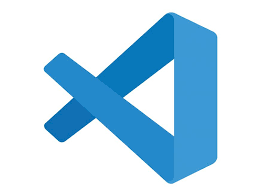</font>


# **What type of computing platform do data scientists use most often?**

<font size="5">Another one clickable chart use it to explore allocation of current role and what computational planform these people use.
<br><br>You can infer that <strong>cloud platforms</strong> mostly used by <em>Data Scientists</em> and <em>Research Scientist</em> then other roles.</font>

In [ ]:
data_ukraine["Q11"].fillna("None", inplace=True)
data_ukraine['Q11'].replace({
    'A laptop': 'Laptop',
    'A personal computer / desktop': 'Desktop',
    'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)': 'Cloud Computing',
    'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)': 'DL workstation',
    'None': 'Prefer not to answer'
}, inplace=True)


fig = px.sunburst(data_ukraine, path=['Q5', 'Q11'], color='Q5')
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Types of computing platform</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

# **Which types of specialized hardware do data scientists in Ukraine use on a regular basis?**

In [ ]:
data_ukraine_q12 = (data_ukraine.iloc[:,52:58].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'HW', 'count':'Count'})
          )

data_ukraine_q12['HW'].replace({
    'Q12_Part_1': 'NVIDIA GPUs',
    'Q12_Part_2': 'Google Cloud TPUs',
    'Q12_Part_3': 'AWS Trainium Chips',
    'Q12_Part_4': 'AWS Inferentia Chips',
    'Q12_Part_5': 'None',
    'Q12_OTHER': 'Other'
}, inplace=True)

data_ukraine_q12['percent'] = [((data_ukraine_q12['Count'] / data_ukraine_q12['Count'].sum())*100).iloc[i].round(2).astype(str) + '%' for i in range(6)]
data_ukraine_q12.sort_values(['Count'], ascending=False, inplace=True)
colors = ['#1c204b','#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae']

fig = go.Figure(
   go.Bar(
            x=data_ukraine_q12['HW'],
            y=data_ukraine_q12['Count'],
            text=data_ukraine_q12['percent'],
            marker_color=colors))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=40),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Specialized hardware</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

# **How many times have ukrainian data scientists used a TPU?**

In [ ]:
tpu_usage = (data_ukraine['Q13'].value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'tpu', 'Q13':'Count'})
          ) 

fig = go.Figure(data=[go.Pie(labels=tpu_usage['tpu'], 
                             values=tpu_usage['Count'])])

colors = ['#1c204b','#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae']

fig.update_traces(hoverinfo='percent+value', 
                  textinfo='label', 
                  textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=2)))

fig.update_layout(showlegend=False,
                  margin=dict(pad=120),
                  title_text="<b>TPU usage</b>",
                  title_x=0.55,
                  font=dict(family='serif', size=20, color='#000000'))

fig.show()

<font size="5">Sadly, but most ukrainians do not use TPUs or used it just several times.</font>

# **For how many years have data scientists used machine learning methods?**

In [ ]:
data_ukraine["Q15"].fillna("None", inplace=True)
data_ukraine['Q15'].replace({
    'None': 'Prefer not to answer'
}, inplace=True)

fig = make_subplots(rows=1, cols=2, subplot_titles=("<b>Men</b>", "<b>Women</b>"), shared_yaxes=True)

experience_man = (
    data_ukraine[data_ukraine['Q2']=='Man']['Q15']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Experience', 'Q15':'Count'})
          )  

experience_man['percent'] = ((experience_man['Count'] / experience_man['Count'].sum())*100).round(2).astype(str) + '%'
colors_man = ['#012a4a','#013a63','#01497c','#014f86', '#2a6f97', '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']


fig.add_trace(
    go.Bar(
            x=experience_man['Experience'],
            y=experience_man['Count'],
            text=experience_man['percent'],
            marker_color=colors_man),
    row=1, col=1
)
fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra>',
                  textfont_size=17)


experience_woman = (
    data_ukraine[data_ukraine['Q2']=='Woman']['Q15']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Experience', 'Q15':'Count'})
          )  

experience_woman['percent'] = ((experience_woman['Count'] / experience_woman['Count'].sum())*100).round(2).astype(str) + '%'
colors_woman = ['#FF7B00','#FF8800','#FF9500','#FFA200', '#FFAA00', '#FFB700','#FFC300', '#FFD000', '#FFDD00', '#FFEA00']

fig.add_trace(
   go.Bar(
            x=experience_woman['Experience'],
            y=experience_woman['Count'],
            text=experience_woman['percent'],
            marker_color=colors_woman),
    row=1, col=2)

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)
                  
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Experience Distribution</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()


<font size="5">It is plain to see ukrainians have around <em>3-4 years</em> in applying Machine Learning algorithms! And girls pretty much on the same level with boys. Amazing!</font>

<font size="5">On the sunburst chart below you can explore relation of current role an years of experience in applying ML. Have fun!</font>

In [ ]:
fig = px.sunburst(data_ukraine, path=['Q2','Q5', 'Q15'], color='Q2',color_discrete_map={'Man':'#0077b6', 'Woman':'#ffff3f'})
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Relation between current role and years of experience</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

# **Machine learning frameworks**

<font size="5">There are a lot of different frameworks. It is no need to argue which one is better or worse. They are all good for their stuff! <br><br>I really enjoy doing deep learning using <em>PyTorch</em> lately :)</font>

In [ ]:
data_ukraine.iloc[:,72:90].describe().T

In [ ]:
data_ukraine_q16 = (data_ukraine.iloc[:,72:90].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Libs', 'count':'Count'})
          )
data_ukraine_q16.drop(data_ukraine_q16.index[5], inplace=True)

data_ukraine_q16['Libs'].replace({
    'Q16_Part_1': 'Scikit-learn',
    'Q16_Part_2': 'TensorFlow',
    'Q16_Part_3': 'Keras',
    'Q16_Part_4': 'PyTorch',
    'Q16_Part_5': 'Fast.ai',
    'Q16_Part_7': 'Xgboost',
    'Q16_Part_8': 'LightGBM',
    'Q16_Part_9': 'CatBoost',
    'Q16_Part_10': 'Prophet',
    'Q16_Part_11': 'H2O 3',
    'Q16_Part_12': 'Caret',
    'Q16_Part_13': 'Tidymodels',
    'Q16_Part_14': 'JAX',
    'Q16_Part_15': 'PyTorch Lightning',
    'Q16_Part_16': 'Huggingface',
    'Q16_Part_17': 'None',
    'Q16_OTHER': 'Other'
}, inplace=True)

data_ukraine_q16['percent'] = [((data_ukraine_q16['Count'] / data_ukraine_q16['Count'].sum())*100).iloc[i].round(2).astype(str) + '%' for i in range(17)]
data_ukraine_q16.sort_values(['Count'], ascending=False, inplace=True)


colors = ['#1c204b','#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae',
          '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']

fig = go.Figure(
   go.Bar(
            x=data_ukraine_q16['Libs'],
            y=data_ukraine_q16['Count'],
            text=data_ukraine_q16['percent'],
            marker_color=colors))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=40),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Most popular frameworks</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

<font size="5">
<img src="http://softwareengineeringdaily.com/wp-content/uploads/2016/09/scikit-learn-logo.png" width="600" height="300">
<img src="https://camo.githubusercontent.com/37a83e8eca1db15cf70475cc6bdd4880b1f7b04d/68747470733a2f2f7777772e74656e736f72666c6f772e6f72672f696d616765732f74665f6c6f676f5f686f72697a6f6e74616c2e706e67" width="600" height="300">
<img src="https://keras.io/img/logo.png" width="600" height="400">
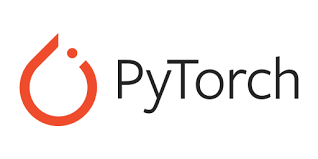</font>

# **Popular ML algorithms**

In [ ]:
data_ukraine.iloc[:,90:102].describe().T

<font size="5">The same for algorithms. They are all good for their stuff! But the most popular in Ukraine are <em>Regression</em> and <em>Decission Trees</em>. CNNs and Transformers also have their positions. It's cool!</font>

In [ ]:
data_ukraine_q17 = (data_ukraine.iloc[:,90:102].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'algorithms', 'count':'Count'})
          ) 
data_ukraine_q17['algorithms'].replace({
    'Q17_Part_1': 'Linear/Logistic Regression',
    'Q17_Part_2': 'DecisionTrees / RandomForests',
    'Q17_Part_3': 'Gradient Boosting Machines',
    'Q17_Part_4': 'Bayesian Approaches 	',
    'Q17_Part_5': 'Evolutionary Approaches',
    'Q17_Part_6': 'MLPs',
    'Q17_Part_7': 'CNNs',
    'Q17_Part_8': 'GANs',
    'Q17_Part_9': 'RNNs',
    'Q17_Part_10': 'Transformers (BERT, gpt-3)',
    'Q17_Part_11': 'None',
    'Q17_OTHER': 'Other'
}, inplace=True)

fig = go.Figure(data=[go.Pie(labels=data_ukraine_q17['algorithms'], 
                             values=data_ukraine_q17['Count'])])

colors = ['#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae']

fig.update_traces(hoverinfo='percent+value', 
                  textinfo='label', 
                  textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=1)))

fig.update_layout(showlegend=False, 
                  title_text="<b>Algorithms Distribution</b>",
                  title_x=0.5,
                  font=dict(family='serif', size=20, color='#000000'))

fig.show()

<img src="https://miro.medium.com/max/1024/1*iWzy084DvmZ8fTHQPuE-Aw.png" width="500"> <img src="https://ainxt.co.in/wp-content/uploads/2021/03/LR.png"  width="300">

# **Most usable cloud computing platforms**

In [ ]:
data_ukraine.iloc[:,129:141].describe().T

In [ ]:
data_ukraine_q27 = (data_ukraine.iloc[:,129:141].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'CC', 'count':'Count'})
          ) 

data_ukraine_q27.drop([data_ukraine_q27.index[3], data_ukraine_q27.index[4],data_ukraine_q27.index[7],
                      data_ukraine_q27.index[8], data_ukraine_q27.index[9],], inplace=True)

data_ukraine_q27['CC'].replace({
    'Q27_A_Part_1': 'AWS',
    'Q27_A_Part_2': 'Microsoft Azure',
    'Q27_A_Part_3': 'GCP',
    'Q27_A_Part_6': 'SAP Cloud',
    'Q27_A_Part_7': 'Salesforce Cloud',
    'Q27_A_Part_11': 'None',
    'Q27_A_OTHER': 'Other'
}, inplace=True)

data_ukraine_q27['percent'] = [((data_ukraine_q27['Count'] / data_ukraine_q27['Count'].sum())*100).iloc[i].round(2).astype(str) + '%' for i in range(7)]
data_ukraine_q27.sort_values(['Count'], ascending=False, inplace=True)


colors = ['#1c204b','#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae',
          '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']

fig = go.Figure(
   go.Bar(
            x=data_ukraine_q27['CC'],
            y=data_ukraine_q27['Count'],
            text=data_ukraine_q27['percent'],
            marker_color=colors))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=40),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Popular cloud computing platforms</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()


<font size="5">Not all cloud computing platforms are present in Ukrainian respondents' answers, so, <em>AWS</em> and <em>GCP</em> are the most popular in Ukraine.
<br><br>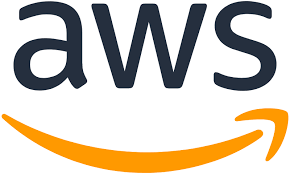
<img src="https://www.gstatic.com/devrel-devsite/prod/v7824338a80ec44166704fb131e1860a66ed443b0ce02adfe8171907535d63bde/cloud/images/social-icon-google-cloud-1200-630.png" width="500"></font>

# **Do Ukrainians use any of the following data storage products on a regular basis?**

In [ ]:
data_ukraine.iloc[:,147:155].describe()

In [ ]:
data_ukraine_q30A = (data_ukraine.iloc[:,147:155].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Storage', 'count':'Count'})
          ) 
data_ukraine_q30A['Storage'].replace({
    'Q30_A_Part_1': 'Microsoft Azure Data Lake Storage',
    'Q30_A_Part_2': 'Microsoft Azure Disk Storage',
    'Q30_A_Part_3': 'Amazon Simple Storage Service (S3)',
    'Q30_A_Part_4': 'Amazon Elastic File System (EFS)',
    'Q30_A_Part_5': 'Google Cloud Storage (GCS)',
    'Q30_A_Part_6': 'Google Cloud Filestore',
    'Q30_A_Part_7': 'None',
    'Q30_A_OTHER': 'Other'
}, inplace=True)

data_ukraine_q30A['percent'] = [((data_ukraine_q30A['Count'] / data_ukraine_q30A['Count'].sum())*100).iloc[i].round(2).astype(str) + '%' for i in range(8)]
data_ukraine_q30A.sort_values(['Count'], ascending=False, inplace=True)

colors = ['#1c204b','#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae']


fig = go.Figure(go.Bar(
            x=data_ukraine_q30A['Count'],
            y=data_ukraine_q30A['Storage'],
            text=data_ukraine_q30A['percent'],
            orientation='h',
            marker_color=colors
                        ))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{x}<extra></extra> ',
                  textfont_size=17)
                  
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': False},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Storage products</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

<font size="5">As expected, <em>S3</em> and <em>Google Cloud Storage</em> are the rock stars! :) It is true. I use it in my work as well!</font>

# **How about managed machine learning products**

In [ ]:
data_ukraine.iloc[:,155:165].describe()

<font size="5">The full list of managed machine learning products that were proposed in survey looks as follows:
<br> <br> ● Amazon SageMaker
<br> ● Azure Machine Learning Studio
<br> ● Google Cloud Vertex AI
<br> ● DataRobot
<br> ● Databricks
<br> ● Dataiku
<br> ● Alteryx
<br> ● Rapidminer
<br> ● No / None
<br> ● Other
<br> <br> Dataiku, Alteryx, Rapidminer are out of interest among Ukrainian data scientists. <br><br>Besides, not a lot of people really use some managed ML products, but still, <em>Amazon SageMaker</em> has some popularity.</font>

In [ ]:
data_ukraine_q31A = (data_ukraine.iloc[:,155:165].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'managed', 'count':'Count'})
          )

data_ukraine_q31A.drop([data_ukraine_q31A.index[5], data_ukraine_q31A.index[6],data_ukraine_q31A.index[7],
                        data_ukraine_q31A.index[9]], inplace=True)

data_ukraine_q31A['managed'].replace({
    'Q31_A_Part_1': 'Amazon SageMaker',
    'Q31_A_Part_2': 'Azure Machine Learning Studio',
    'Q31_A_Part_3': 'Google Cloud Vertex AI',
    'Q31_A_Part_4': 'DataRobot',
    'Q31_A_Part_5': 'Databricks',
    'Q31_A_Part_9': 'None'
}, inplace=True)

data_ukraine_q31A['percent'] = [((data_ukraine_q31A['Count'] / data_ukraine_q31A['Count'].sum())*100).iloc[i].round(2).astype(str) + '%' for i in range(6)]
data_ukraine_q31A.sort_values(['Count'], ascending=False, inplace=True)

colors = ['#1c204b','#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae']


fig = go.Figure(go.Bar(
            x=data_ukraine_q31A['Count'],
            y=data_ukraine_q31A['managed'],
            text=data_ukraine_q31A['percent'],
            orientation='h',
            marker_color=colors
                        ))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{x}<extra></extra> ',
                  textfont_size=17)
                  
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': False},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Managed ML products</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

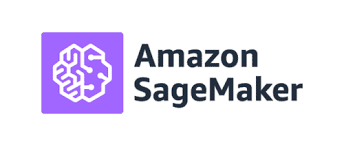

# **Big data products on a regular basis & most often used**

In [ ]:
data_ukraine.iloc[:,165:186].describe()

In [ ]:
data_ukraine_q32A = (data_ukraine.iloc[:,165:186].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'BD', 'count':'Count'})
          )

data_ukraine_q32A.drop([data_ukraine_q32A.index[5], data_ukraine_q32A.index[6],data_ukraine_q32A.index[16],
                        data_ukraine_q32A.index[17], data_ukraine_q32A.index[18]], inplace=True)

data_ukraine_q32A['BD'].replace({
    'Q32_A_Part_1': 'MySQL',
    'Q32_A_Part_2': 'PostgreSQL',
    'Q32_A_Part_3': 'SQLite',
    'Q32_A_Part_4': 'Oracle Database',
    'Q32_A_Part_5': 'MongoDB',
    'Q32_A_Part_8': 'Microsoft SQL Server',
    'Q32_A_Part_9': 'Microsoft Azure SQL Database',
    'Q32_A_Part_10': 'Microsoft Azure Cosmos DB',
    'Q32_A_Part_11': 'Amazon Redshift',
    'Q32_A_Part_12': 'Amazon Aurora',
    'Q32_A_Part_13': 'Amazon RDS',
    'Q32_A_Part_14': 'Amazon DynamoDB',
    'Q32_A_Part_15': 'Google Cloud BigQuery',
    'Q32_A_Part_16': 'Google Cloud SQL',
    'Q32_A_Part_20': 'None',
    'Q32_A_OTHER': 'Other'
}, inplace=True)

data_ukraine_q32A['percent'] = [((data_ukraine_q32A['Count'] / data_ukraine_q32A['Count'].sum())*100).iloc[i].round(2).astype(str) + '%' for i in range(16)]
data_ukraine_q32A.sort_values(['Count'], ascending=False, inplace=True)

colors_32A = ['#1c204b','#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae',
          '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']

In [ ]:
BD_often = (
    data_ukraine['Q33']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'BD', 'Q33':'Count'})
          )  
BD_often['percent'] = ((BD_often['Count'] / BD_often['Count'].sum())*100).round(2).astype(str) + '%'
colors_BD_often = ['#FF7B00','#FF8800','#FF9500','#FFA200', '#FFAA00', '#FFB700','#FFC300', '#FFD000', '#FFDD00', '#FFEA00']

In [ ]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("<b>Regular basis used</b>", "<b>Most often used</b>"), shared_yaxes=True)

fig.add_trace(
   go.Bar(
            x=data_ukraine_q32A['BD'],
            y=data_ukraine_q32A['Count'],
            text=data_ukraine_q32A['percent'],
            marker_color=colors_32A), row=1, col=1)

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)

fig.add_trace(
   go.Bar(
            x=BD_often['BD'],
            y=BD_often['Count'],
            text=BD_often['percent'],
            marker_color=colors_BD_often), row=2, col=1)

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(height=1100, 
                  showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=30),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Big data tools distribution</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)

fig.show()

# **What about automated machine learning tools (or partial AutoML tools) on a regular basis**

In [ ]:
data_ukraine.iloc[:,205:213].describe()

<font size="5">Sadly, but not a lot of professionals from Ukraine use any automated machine learning tools.<br>I used albumentations a few times:)</font>

In [ ]:
data_ukraine_q36A = (data_ukraine.iloc[:,205:213].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'AutoML', 'count':'Count'})
          )
data_ukraine_q36A.drop([data_ukraine_q36A.index[3], data_ukraine_q36A.index[7]], inplace=True)

data_ukraine_q36A['AutoML'].replace({
    'Q36_A_Part_1': 'Automated data augmentation (e.g. imgaug, albumentations)',
    'Q36_A_Part_2': 'Automated feature engineering/selection (e.g. tpot, boruta_py)',
    'Q36_A_Part_3': 'Automated model selection (e.g. auto-sklearn, xcessiv)',
    'Q36_A_Part_5': 'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)',
    'Q36_A_Part_6': 'Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI)',
    'Q36_A_Part_7': 'No'
}, inplace=True)

data_ukraine_q36A['percent'] = [((data_ukraine_q36A['Count'] / data_ukraine_q36A['Count'].sum())*100).iloc[i].round(2).astype(str) + '%' for i in range(6)]
data_ukraine_q36A.sort_values(['Count'], ascending=False, inplace=True)

colors = ['#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae']


fig = go.Figure(go.Bar(
            x=data_ukraine_q36A['Count'],
            y=data_ukraine_q36A['AutoML'],
            text=data_ukraine_q36A['percent'],
            orientation='h',
            marker_color=colors
                        ))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{x}<extra></extra> ',
                  textfont_size=17)
                  
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': False},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Automated machine learning tools</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

# **Tools to help manage machine learning experiments**

In [ ]:
data_ukraine.iloc[:,221:233].describe()

<font size="5">Yeap, <em>TensorBoard</em> indeed has some popularity in Ukraine!</font>

In [ ]:
data_ukraine_q38A = (data_ukraine.iloc[:,221:233].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'experiments', 'count':'Count'})
          )
data_ukraine_q38A.drop([data_ukraine_q38A.index[2], data_ukraine_q38A.index[3], data_ukraine_q38A.index[5], data_ukraine_q38A.index[6], 
                        data_ukraine_q38A.index[7], data_ukraine_q38A.index[8]], inplace=True)

data_ukraine_q38A['experiments'].replace({
    'Q38_A_Part_1': 'Neptune.ai',
    'Q38_A_Part_2': 'Weights & Biases',
    'Q38_A_Part_5': 'TensorBoard',
    'Q38_A_Part_10': 'MLflow',
    'Q38_A_Part_11': 'No',
    'Q38_A_OTHER': 'Other'
}, inplace=True)

fig = go.Figure(data=[go.Pie(labels=data_ukraine_q38A['experiments'], 
                             values=data_ukraine_q38A['Count'])])

colors = ['#1f2354','#252a64', '#2b3175', '#323885',  '#383f95', '#3b439e', '#3e46a6', '#414aae']

fig.update_traces(hoverinfo='percent+value', 
                  textinfo='label', 
                  textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=1)))

fig.update_layout(showlegend=False, 
                  title_text="<b>Experiments management tools</b>",
                  title_x=0.55,
                  font=dict(family='serif', size=20, color='#000000'))

fig.show()

# **Where do Ukrainian data scientists publicly share or deploy their data analysis or machine learning applications?**

In [ ]:
data_ukraine.iloc[:,233:243].describe()

In [ ]:
data_ukraine_q39 = (data_ukraine.iloc[:,233:243].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'deploy', 'count':'Count'})
          )
data_ukraine_q39.drop([data_ukraine_q39.index[2], data_ukraine_q39.index[7]], inplace=True)

data_ukraine_q39['deploy'].replace({
    'Q39_Part_1': 'Plotly Dash',
    'Q39_Part_2': 'Streamlit',
    'Q39_Part_4': 'GitHub',
    'Q39_Part_5': 'Personal blog',
    'Q39_Part_6': 'Kaggle',
    'Q39_Part_7': 'Colab',
    'Q39_Part_9': 'I do not share my work publicly',
    'Q39_OTHER': 'Other'
}, inplace=True)

fig = go.Figure(data=[go.Pie(labels=data_ukraine_q39['deploy'], 
                             values=data_ukraine_q39['Count'])])

colors = ['#1f2354','#252a64', '#2b3175', '#323885',  '#383f95', '#3b439e', '#3e46a6', '#414aae']

fig.update_traces(hoverinfo='percent+value', 
                  textinfo='label', 
                  textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=1)))

fig.update_layout(showlegend=False, 
                  title_text="<b>Public deploy platforms</b>",
                  title_x=0.53,
                  font=dict(family='serif', size=20, color='#000000'))

fig.show()

# **Upgrade your skills**

In [ ]:
data_ukraine.iloc[:,243:255].describe()

In [ ]:
data_ukraine_q40 = (data_ukraine.iloc[:,243:255].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'courses', 'count':'Count'})
          )

data_ukraine_q40['courses'].replace({
    'Q40_Part_1': 'Coursera',
    'Q40_Part_2': 'edX',
    'Q40_Part_3': 'Kaggle Learn Courses',
    'Q40_Part_4': 'DataCamp',
    'Q40_Part_5': 'Fast.ai',
    'Q40_Part_6': 'Udacity',
    'Q40_Part_7': 'Udemy',
    'Q40_Part_8': 'LinkedIn Learning',
    'Q40_Part_9': 'Cloud-certification programs',
    'Q40_Part_10': 'University Courses',
    'Q40_Part_11': 'None',
    'Q40_OTHER': 'Other'
}, inplace=True)


data_ukraine_q40['percent'] = [((data_ukraine_q40['Count'] / data_ukraine_q40['Count'].sum())*100).iloc[i].round(2).astype(str) + '%' for i in range(12)]
data_ukraine_q40.sort_values(['Count'], ascending=False, inplace=True)


colors = ['#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae',
          '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']

fig = go.Figure(
   go.Bar(
            x=data_ukraine_q40['courses'],
            y=data_ukraine_q40['Count'],
            text=data_ukraine_q40['percent'],
            marker_color=colors))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=40),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Learning platforms</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

<font size="5">I looooove learning! I tried almost all these platforms and they are really great! Never stop exploring something new on your way :)</font>

# **Popular media sources that report on data science topics**

In [ ]:
data_ukraine.iloc[:,256:268].describe()

In [ ]:
data_ukraine_q42 = (data_ukraine.iloc[:,256:268].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'media', 'count':'Count'})
          )
data_ukraine_q42['media'].replace({
    'Q42_Part_1': 'Twitter (data science influencers)',
    'Q42_Part_2': 'Email newsletters (Data Elixir, OReilly Data & AI, etc)',
    'Q42_Part_3': 'Reddit (r/machinelearning, etc)',
    'Q42_Part_4': 'Kaggle (notebooks, forums, etc)',
    'Q42_Part_5': 'Course Forums (forums.fast.ai, Coursera forums, etc)',
    'Q42_Part_6': 'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)',
    'Q42_Part_7': 'Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)',
    'Q42_Part_8': 'Blogs (Towards Data Science, Analytics Vidhya, etc)',
    'Q42_Part_9': 'Journal Publications (peer-reviewed journals, conference proceedings, etc)',
    'Q42_Part_10': 'Slack Communities (ods.ai, kagglenoobs, etc)',
    'Q42_Part_11': 'None',
    'Q42_OTHER': 'Other'
}, inplace=True)


data_ukraine_q42['percent'] = [((data_ukraine_q42['Count'] / data_ukraine_q42['Count'].sum())*100).iloc[i].round(2).astype(str) + '%' for i in range(12)]
data_ukraine_q42.sort_values(['Count'], ascending=False, inplace=True)


colors = ['#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae',
          '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']


fig = go.Figure(go.Bar(
            x=data_ukraine_q42['Count'],
            y=data_ukraine_q42['media'],
            text=data_ukraine_q42['percent'],
            orientation='h',
            marker_color=colors
                        ))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{x}<extra></extra> ',
                  textfont_size=17)
                  
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': False},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Media platforms</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()


<font size="5">My personal choice YouTube and Blogs!</font>

# **In what industry is your current employer/contract?**
## **What is the size of the company where you are employed?**
### **How many individuals are responsible for data science workloads at your place of business?**

In [ ]:
data_ukraine["Q20"].fillna("No answer", inplace=True)
data_ukraine["Q21"].fillna("No answer", inplace=True)
data_ukraine["Q22"].fillna("No answer", inplace=True)

<font size="5">Time to explore idustry!</font>

In [ ]:
data_ukraine_q20 = (data_ukraine['Q20'].value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'industry', 'Q20':'Count'})
          )

data_ukraine_q20['percent'] = ((data_ukraine_q20['Count'] / data_ukraine_q20['Count'].sum())*100).round(2).astype(str) + '%'


colors = ['#1f2354','#22275c','#252a64', '#282e6c',  '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae',
          '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']

fig = go.Figure(
   go.Bar(
            x=data_ukraine_q20['industry'],
            y=data_ukraine_q20['Count'],
            text=data_ukraine_q20['percent'],
            marker_color=colors))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=40),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Industry allocation</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

<font size="5">Yet another one clickable sunburst plot! Feel free to investigate how size of Data Science Team depends on company size and industry :)</font>

In [ ]:
fig = px.sunburst(data_ukraine, path=['Q20','Q21', 'Q22'], color='Q20')
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Relation between industry, size of the company and DS team size</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

# **Do employers incorporate machine learning methods into their business?**

<font size="5">As it might be seen, most companies not use ML in production, but put effort in investigation of this new exciting area!</font>

In [ ]:
business = (
    data_ukraine['Q23']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'business', 'Q23':'Count'})
          )  

business['percent'] = ((business['Count'] / business['Count'].sum())*100).round(2).astype(str) + '%'
colors = ['#1f2354', '#282e6c', '#2b3175', '#353c8d', '#383f95', '#3e46a6', 
          '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']

fig = go.Figure(go.Bar(
            x=business['Count'],
            y=business['business'],
            text=business['percent'],
            orientation='h',
            marker_color=colors
                        ))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{x}<extra></extra> ',
                  textfont_size=17)
                  
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': False},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Employer incorporate machine learning methods</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

# **Activities that make up an important part of your role at work**

In [ ]:
data_ukraine.iloc[:,119:127].describe()
  

<font size="5">My favorite part of my work is building models and applying them to the data. You can see from the chart below that this is indeed an important part of work for a lot of other people!</font>

In [ ]:
data_ukraine_q24 = (data_ukraine.iloc[:,119:127].describe().T['count']
    .to_frame()
    .reset_index()
    .rename(columns={'index':'work', 'count':'Count'})
          )
data_ukraine_q24['work'].replace({
    'Q24_Part_1': 'Analyze and understand data to influence product or business decisions',
    'Q24_Part_2': 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
    'Q24_Part_3': 'Build prototypes to explore applying machine learning to new areas',
    'Q24_Part_4': 'Build and/or run a machine learning service that operationally improves my product or workflows',
    'Q24_Part_5': 'Experimentation and iteration to improve existing ML models',
    'Q24_Part_6': 'Do research that advances the state of the art of machine learning',
    'Q24_Part_7': 'None of these activities are an important part of my role at work',
    'Q24_OTHER': 'Other'
}, inplace=True)


data_ukraine_q24['percent'] = [((data_ukraine_q24['Count'] / data_ukraine_q24['Count'].sum())*100).iloc[i].round(2).astype(str) + '%' for i in range(8)]
data_ukraine_q24.sort_values(['Count'], ascending=False, inplace=True)

colors = ['#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2f357d', '#323885', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae',
          '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']


fig = go.Figure(go.Bar(
            x=data_ukraine_q24['Count'],
            y=data_ukraine_q24['work'],
            text=data_ukraine_q24['percent'],
            orientation='h',
            marker_color=colors
                        ))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{x}<extra></extra> ',
                  textfont_size=17)
                  
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=20),
                  xaxis={'showticklabels': False},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Important parts of work</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

# **Current yearly compensation (approximate $USD)**

<img src="https://2s7gjr373w3x22jf92z99mgm5w-wpengine.netdna-ssl.com/wp-content/uploads/2016/10/shutterstock_show_me_the_money_-Melpomene.jpg">

In [ ]:
data_ukraine_q25 = (data_ukraine['Q25'].value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'compensation', 'Q25':'Count'})
          )

data_ukraine_q25['percent'] = ((data_ukraine_q25['Count'] / data_ukraine_q25['Count'].sum())*100).round(2).astype(str) + '%'


colors = ['#1f2354','#22275c','#252a64', '#282e6c', '#2b3175','#2b3175', '#2f357d', '#2f357d', '#323885', '#353c8d', '#353c8d', '#383f95', '#3b439e', '#3e46a6', '#414aae',
          '#2c7da0','#468faf', '#61a5c2', '#89c2d9', '#a9d6e5']

fig = go.Figure(
   go.Bar(
            x=data_ukraine_q25['compensation'],
            y=data_ukraine_q25['Count'],
            text=data_ukraine_q25['percent'],
            marker_color=colors))

fig.update_traces(texttemplate='%{text}', 
                  textposition='outside',
                  cliponaxis = False,
                  hovertemplate='<b>Count</b>: %{y}<extra></extra> ',
                  textfont_size=17)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 
fig.update_layout(showlegend=False, 
                  plot_bgcolor='white', 
                  margin=dict(pad=40),
                  xaxis={'showticklabels': True},
                  yaxis_title=None,
                  xaxis_title=None,
                  yaxis={'categoryorder':'total ascending'},
                  title_text="<b>Yearly compensation</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=17, color='#000000'),
                  title_font_size=30)
fig.show()

# **Conclusions**

<font size="5">I really appreciate that you have read and explored all this stuff! Thank you! I hope you enjoyed it :)
<br><br>In conclusion, I want to say that Data Science and Machine Learning industry is pretty young in Ukraine, but it is growing extremely fast! I hope, in the near future, our community will have even more talented people who will push data science to the stars!
<br><br><img src="https://pyimagesearch.com/wp-content/uploads/2016/05/cat_face_detector_result_04.jpg"></font>